/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]


Validation Accuracy: 0.8852
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2515
           1       0.87      0.90      0.89      2485

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



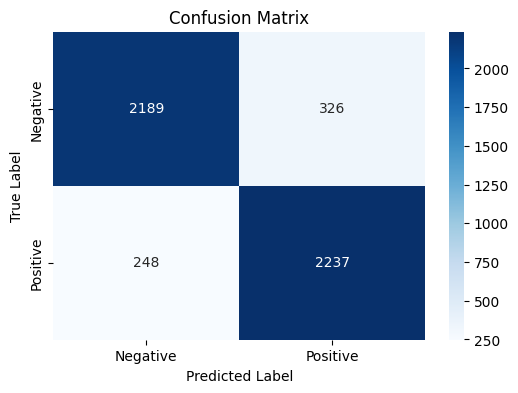


Sentiment Predictions on Sample Movie Reviews:

Review: The movie was a thrilling adventure with breathtaking visuals!
Sentiment: Positive

Review: I found the plot to be boring and the acting was terrible.
Sentiment: Negative

Review: An outstanding performance by the lead actor, highly recommended!
Sentiment: Positive

Review: Waste of time. The story made no sense and was very predictable.
Sentiment: Negative

Review: A heartwarming tale that truly touched my soul.
Sentiment: Positive

Review: Poor direction and bad screenplay ruined the movie experience.
Sentiment: Negative



/tmp/ipython-input-3016154607.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette="viridis")


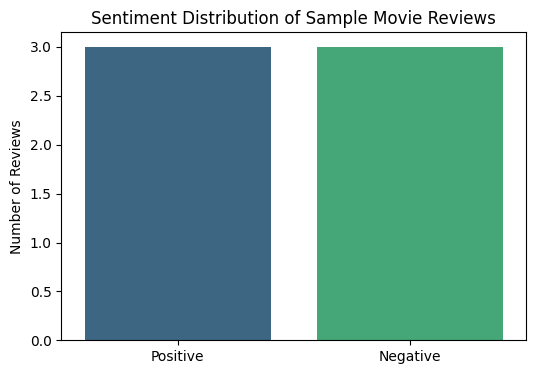

In [1]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def main():

    dataset = load_dataset('imdb')
    texts = dataset['train']['text']
    labels = dataset['train']['label']

    X_train, X_val, y_train, y_val = train_test_split(list(texts), list(labels), test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_val_tfidf)
    acc = accuracy_score(y_val, y_pred)
    print(f"\nValidation Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


    movie_reviews = [
        "The movie was a thrilling adventure with breathtaking visuals!",
        "I found the plot to be boring and the acting was terrible.",
        "An outstanding performance by the lead actor, highly recommended!",
        "Waste of time. The story made no sense and was very predictable.",
        "A heartwarming tale that truly touched my soul.",
        "Poor direction and bad screenplay ruined the movie experience."
    ]

    review_vectors = vectorizer.transform(movie_reviews)
    review_preds = model.predict(review_vectors)


    print("\nSentiment Predictions on Sample Movie Reviews:\n")
    for review, pred in zip(movie_reviews, review_preds):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"Review: {review}\nSentiment: {sentiment}\n")


    sentiments = ["Positive" if p == 1 else "Negative" for p in review_preds]
    sentiment_counts = {"Positive": sentiments.count("Positive"), "Negative": sentiments.count("Negative")}

    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette="viridis")
    plt.title("Sentiment Distribution of Sample Movie Reviews")
    plt.ylabel("Number of Reviews")
    plt.show()

if __name__ == "__main__":
    main()